<a href="https://colab.research.google.com/github/harshhrawte/ADSA/blob/main/DL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset structure:

Each image (.jpg) represents a top-view of a parking lot.

Each JSON file (.json) contains annotations (bounding boxes) for parking spaces, with labels like "occupied" or "vacant".

Essentially, the dataset is paired — every image has a corresponding JSON describing the exact positions of cars and free spots.

In [1]:
#basic overview of whats the file structure of the dataset contains
import os
import kagglehub

# Download dataset
path = kagglehub.dataset_download("loveffc/parking-space-detection-based-on-top-view")
print("Dataset downloaded to:", path)

# Walk through and print structure like a tree
for root, dirs, files in os.walk(path):
    level = root.replace(path, "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")


100%|██████████| 26.3M/26.3M [00:00<00:00, 85.5MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/loveffc/parking-space-detection-based-on-top-view/versions/1
1/
    137.jpg
    21.json
    164.json
    45.json
    58.json
    152.jpg
    55.json
    111.json
    92.json
    74.json
    36.jpg
    112.jpg
    22.jpg
    159.jpg
    134.json
    53.jpg
    103.json
    121.json
    83.json
    34.json
    11.json
    156.jpg
    32.jpg
    108.jpg
    134.jpg
    63.json
    130.jpg
    145.json
    24.jpg
    53.json
    88.jpg
    156.json
    148.jpg
    120.jpg
    104.json
    129.json
    46.jpg
    34.jpg
    133.jpg
    60.json
    121.jpg
    33.jpg
    127.jpg
    20.jpg
    23.json
    163.json
    96.jpg
    26.json
    109.json
    150.json
    152.json
    126.jpg
    6.json
    105.jpg
    146.jpg
    69.json
    135.json
    41.json
    158.json
    132.jpg
    120.json
    100.json
    122.jpg
    18.jpg
    76.jpg
    1.json
    73.jpg
    94.jpg
    14.jpg
    44.jpg
    85.jpg
    101.json
    90.json
    90.

# Combined the .jpg images and their .json annotations to feed into a Faster R-CNN object detection model.

Using Colab cache for faster access to the 'parking-space-detection-based-on-top-view' dataset.
Dataset downloaded to: /kaggle/input/parking-space-detection-based-on-top-view
✅ Found image: /kaggle/input/parking-space-detection-based-on-top-view/1.jpg
✅ Found JSON: /kaggle/input/parking-space-detection-based-on-top-view/1.json


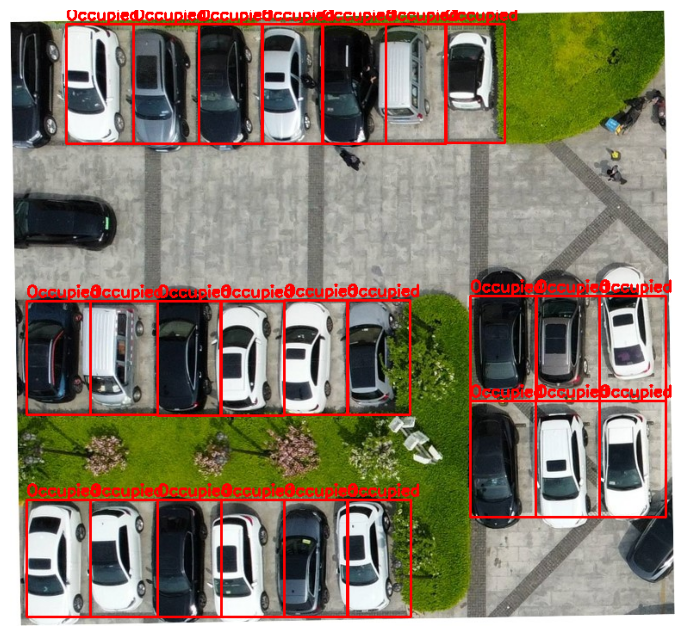

In [3]:
#combine json and jpg file

import os
import kagglehub
import json
import cv2
import matplotlib.pyplot as plt

# Download dataset
path = kagglehub.dataset_download("loveffc/parking-space-detection-based-on-top-view")
print("Dataset downloaded to:", path)

# Function to check if image + JSON exist and visualize
def check_sample(image_name):
    img_path = None
    json_path = None

    # Search for files
    for root, _, files in os.walk(path):
        if image_name in files:
            img_path = os.path.join(root, image_name)
        if image_name.replace(".jpg", ".json") in files:
            json_path = os.path.join(root, image_name.replace(".jpg", ".json"))

    if img_path is None or json_path is None:
        print(f"❌ Could not find both image and JSON for {image_name}")
        return

    print(f"✅ Found image: {img_path}")
    print(f"✅ Found JSON: {json_path}")

    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load JSON
    with open(json_path, "r") as f:
        data = json.load(f)

    # Draw bounding boxes
    for item in data["labels"]:
        name = item["name"]
        x1, y1, x2, y2 = item["x1"], item["y1"], item["x2"], item["y2"]
        color = (255, 0, 0) if name.lower() == "occupied" else (0, 255, 0)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, name, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Show image
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# 🔎 Test with a sample image (e.g., 1.jpg)
check_sample("1.jpg")


# Combined the .jpg images and their .json annotations to feed into a Faster R-CNN object detection model.

Using Colab cache for faster access to the 'parking-space-detection-based-on-top-view' dataset.
Dataset downloaded to: /kaggle/input/parking-space-detection-based-on-top-view
✅ Found image: /kaggle/input/parking-space-detection-based-on-top-view/124.jpg
✅ Found JSON: /kaggle/input/parking-space-detection-based-on-top-view/124.json


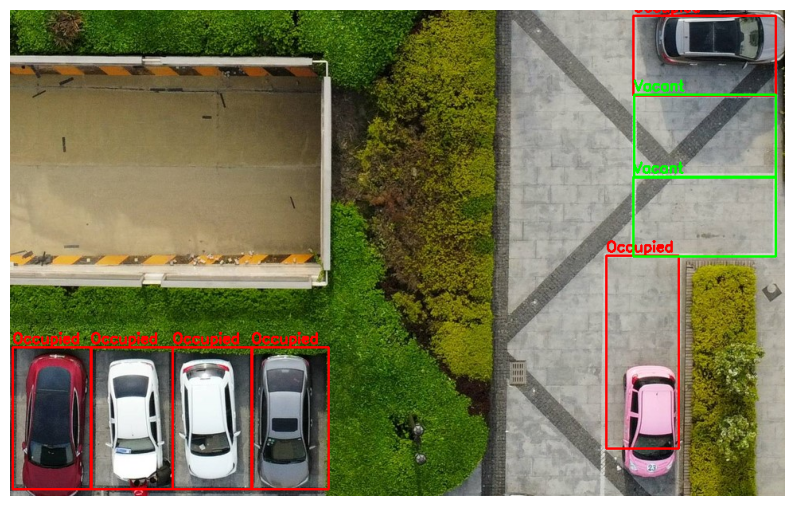

In [7]:
import os
import kagglehub
import json
import cv2
import matplotlib.pyplot as plt

# Download dataset
path = kagglehub.dataset_download("loveffc/parking-space-detection-based-on-top-view")
print("Dataset downloaded to:", path)

# Function to check if image + JSON exist and visualize
def check_sample(image_name):
    img_path = None
    json_path = None

    # Search for files
    for root, _, files in os.walk(path):
        if image_name in files:
            img_path = os.path.join(root, image_name)
        if image_name.replace(".jpg", ".json") in files:
            json_path = os.path.join(root, image_name.replace(".jpg", ".json"))

    if img_path is None or json_path is None:
        print(f"❌ Could not find both image and JSON for {image_name}")
        return

    print(f"✅ Found image: {img_path}")
    print(f"✅ Found JSON: {json_path}")

    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load JSON
    with open(json_path, "r") as f:
        data = json.load(f)

    # Draw bounding boxes
    for item in data["labels"]:
        name = item["name"]
        x1, y1, x2, y2 = item["x1"], item["y1"], item["x2"], item["y2"]
        color = (255, 0, 0) if name.lower() == "occupied" else (0, 255, 0)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, name, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Show image
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# 🔎 Test with a sample image (e.g., 124.jpg)
check_sample("124.jpg")


#The code creates a PyTorch dataset that pairs each .jpg image with its .json annotations. It reads bounding boxes and labels from the JSON and converts them into tensors. Transforms the images to PyTorch tensors so they can be fed into Faster R-CNN.


In [2]:
#mapping becoz rcnn wil not understand how the jpg and json works
import os
import kagglehub
import json
import torch
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as T

# 🔽 Step 1: Download dataset and get its path
path = kagglehub.dataset_download("loveffc/parking-space-detection-based-on-top-view")
print("Dataset downloaded to:", path)

# 🔽 Step 2: Custom Dataset class
class ParkingDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        # Walk through dataset folders to collect all jpgs
        self.images = []
        for root, _, files in os.walk(root_dir):
            for f in files:
                if f.endswith(".jpg"):
                    self.images.append(os.path.join(root, f))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Image path
        img_path = self.images[idx]
        img_name = os.path.basename(img_path)

        # JSON path (search in same dir)
        json_path = img_path.replace(".jpg", ".json")

        # Load image
        img = Image.open(img_path).convert("RGB")

        # Load JSON
        with open(json_path, "r") as f:
            data = json.load(f)

        boxes, labels = [], []

        # 🚨 Some JSONs have "root" → "labels", some may have just "labels"
        annotations = data["root"]["labels"] if "root" in data else data["labels"]

        for obj in annotations:
            x1, y1, x2, y2 = obj["x1"], obj["y1"], obj["x2"], obj["y2"]
            boxes.append([x1, y1, x2, y2])
            labels.append(1 if obj["name"].lower() == "occupied" else 0)  # 1=Occupied, 0=Vacant

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels}

        if self.transform:
            img = self.transform(img)

        return img, target


# ✅ Step 3: Example usage
transform = T.Compose([T.ToTensor()])
dataset = ParkingDataset(path, transform=transform)

# Test sample
img, target = dataset[0]
print("Image shape:", img.shape)
print("Boxes:", target["boxes"])
print("Labels:", target["labels"])


100%|██████████| 26.3M/26.3M [00:02<00:00, 11.2MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/loveffc/parking-space-detection-based-on-top-view/versions/1
Image shape: torch.Size([3, 737, 940])
Boxes: tensor([[ 15., 444., 182., 534.],
        [ 15., 626., 183., 726.],
        [654.,  47., 746., 211.],
        [ 18.,  48., 109., 213.],
        [474.,  47., 564., 212.],
        [293.,  47., 385., 212.],
        [108.,  48., 197., 213.],
        [835.,  47., 924., 211.],
        [540., 433., 623., 591.],
        [385.,  47., 475., 212.],
        [ 15., 534., 182., 626.],
        [713., 433., 807., 591.],
        [564.,  47., 655., 211.],
        [745.,  47., 836., 211.],
        [806., 432., 896., 591.],
        [623., 433., 714., 591.]])
Labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])


# Simple and Basic training for 2 epochs (ignore this and focus on 50 epochs )

Using Colab cache for faster access to the 'parking-space-detection-based-on-top-view' dataset.
Dataset downloaded to: /kaggle/input/parking-space-detection-based-on-top-view
Total images: 150
Creating model (mobilenet backbone)...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth


100%|██████████| 74.2M/74.2M [00:00<00:00, 175MB/s]


Quick training start…


Epoch 1/2: 100%|██████████| 60/60 [00:09<00:00,  6.03it/s]


Epoch 1 train loss: 10.9926


Epoch 2/2: 100%|██████████| 60/60 [00:06<00:00,  9.38it/s]


Epoch 2 train loss: 9.8279
Quick model saved to: /content/parking_rcnn_quick.pth


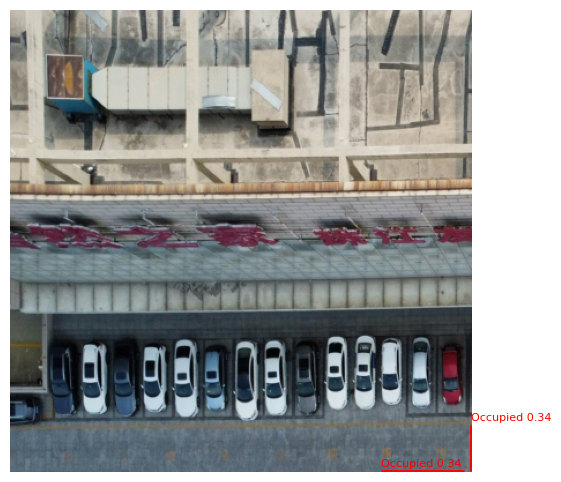

In [3]:
# Quick Test Training (Option 1)
# Run in Google Colab T4 - ~5-8 min total

import os, json, random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import kagglehub
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms as T
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# ---------------- Config ----------------
DATASET_KAGGLE = "loveffc/parking-space-detection-based-on-top-view"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 2
NUM_EPOCHS = 2   # <<< reduced
LR = 0.005
OUTPUT_DIR = "/content"
QUICK_MODEL_PATH = os.path.join(OUTPUT_DIR, "parking_rcnn_quick.pth")
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# ---------------- Download dataset ----------------
print("Downloading dataset…")
path = kagglehub.dataset_download(DATASET_KAGGLE)
print("Dataset downloaded to:", path)

# ---------------- Dataset class ----------------
class ParkingDataset(Dataset):
    def __init__(self, root_dir, transforms=None):
        self.root_dir = root_dir
        self.transforms = transforms
        self.image_paths = []
        for root, _, files in os.walk(root_dir):
            for f in files:
                if f.lower().endswith((".jpg", ".png")):
                    self.image_paths.append(os.path.join(root, f))
        self.image_paths = sorted(self.image_paths)
        if len(self.image_paths) == 0:
            raise RuntimeError(f"No images found under {root_dir}")

    def __len__(self): return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        json_path = img_path.rsplit(".", 1)[0] + ".json"

        img = Image.open(img_path).convert("RGB")
        w, h = img.size

        if os.path.exists(json_path):
            with open(json_path, "r") as f:
                data = json.load(f)
            annotations = data.get("labels", data if isinstance(data, list) else [])
        else:
            annotations = []

        boxes, labels = [], []
        for obj in annotations:
            try:
                x1, y1 = int(obj.get("x1", obj.get("xmin", 0))), int(obj.get("y1", obj.get("ymin", 0)))
                x2, y2 = int(obj.get("x2", obj.get("xmax", w-1))), int(obj.get("y2", obj.get("ymax", h-1)))
            except: continue
            if x2 <= x1 or y2 <= y1: continue
            boxes.append([x1,y1,x2,y2])
            name = str(obj.get("name","")).lower()
            labels.append(1 if "vac" in name else 2)

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels, "image_id": torch.tensor([idx])}
        if self.transforms: img = self.transforms(img)
        return img, target

# ---------------- Transform & Dataset ----------------
transform = T.Compose([
    T.Resize((400,400)),   # <<< smaller image = faster training
    T.ToTensor()
])
dataset = ParkingDataset(path, transforms=transform)
print("Total images:", len(dataset))

train_size = int(0.8*len(dataset))
val_size = len(dataset)-train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

def collate_fn(batch): return tuple(zip(*batch))
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(val_ds, batch_size=1, shuffle=False, collate_fn=collate_fn)

# ---------------- Model ----------------
num_classes = 3
print("Creating model (mobilenet backbone)...")
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.to(DEVICE)

# ---------------- Optimizer ----------------
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=LR, momentum=0.9)

# ---------------- Training ----------------
print("Quick training start…")
for epoch in range(NUM_EPOCHS):
    model.train()
    loss_sum = 0
    for images, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}"):
        images = [img.to(DEVICE) for img in images]
        targets = [{k: v.to(DEVICE) for k,v in t.items()} for t in targets]
        loss_dict = model(images, targets)
        loss = sum(loss for loss in loss_dict.values())
        optimizer.zero_grad(); loss.backward(); optimizer.step()
        loss_sum += loss.item()
    print(f"Epoch {epoch+1} train loss: {loss_sum/len(train_loader):.4f}")

torch.save(model.state_dict(), QUICK_MODEL_PATH)
print("Quick model saved to:", QUICK_MODEL_PATH)

# ---------------- Quick Inference ----------------
model.eval()
images, targets = next(iter(val_loader))
images = [img.to(DEVICE) for img in images]
with torch.no_grad():
    preds = model(images)

def visualize(img_tensor, prediction, score_thresh=0.5):
    img = img_tensor.cpu().numpy().transpose(1,2,0)
    fig, ax = plt.subplots(1, figsize=(8,6))
    ax.imshow(img)
    for box,lab,score in zip(prediction[0]["boxes"], prediction[0]["labels"], prediction[0]["scores"]):
        if score < score_thresh: continue
        x1,y1,x2,y2 = box.int().cpu().numpy()
        color = "red" if lab==2 else "green"
        rect = plt.Rectangle((x1,y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2)
        ax.add_patch(rect)
        ax.text(x1, y1-4, f"{'Occupied' if lab==2 else 'Vacant'} {score:.2f}", color=color, fontsize=8)
    ax.axis("off"); plt.show()

visualize(images[0].cpu(), preds, score_thresh=0.3)


# Simple and Basic training for 10 epochs (ignore this and focus on 50 epochs )

Using Colab cache for faster access to the 'parking-space-detection-based-on-top-view' dataset.
Dataset downloaded to: /kaggle/input/parking-space-detection-based-on-top-view
Total images: 150
Creating model (mobilenet backbone)...
Quick training start…


Epoch 1/10: 100%|██████████| 60/60 [00:07<00:00,  8.17it/s]


Epoch 1 train loss: 12.0455


Epoch 2/10: 100%|██████████| 60/60 [00:07<00:00,  8.50it/s]


Epoch 2 train loss: 9.8836


Epoch 3/10: 100%|██████████| 60/60 [00:07<00:00,  8.32it/s]


Epoch 3 train loss: 9.4834


Epoch 4/10: 100%|██████████| 60/60 [00:07<00:00,  8.43it/s]


Epoch 4 train loss: 9.4075


Epoch 5/10: 100%|██████████| 60/60 [00:06<00:00,  8.88it/s]


Epoch 5 train loss: 9.3082


Epoch 6/10: 100%|██████████| 60/60 [00:07<00:00,  8.53it/s]


Epoch 6 train loss: 9.2267


Epoch 7/10: 100%|██████████| 60/60 [00:06<00:00,  8.92it/s]


Epoch 7 train loss: 8.9768


Epoch 8/10: 100%|██████████| 60/60 [00:07<00:00,  8.02it/s]


Epoch 8 train loss: 8.7964


Epoch 9/10: 100%|██████████| 60/60 [00:07<00:00,  8.51it/s]


Epoch 9 train loss: 8.2134


Epoch 10/10: 100%|██████████| 60/60 [00:06<00:00,  9.00it/s]


Epoch 10 train loss: 8.3430
✅ Quick model saved to: /content/parking_rcnn_quick.pth


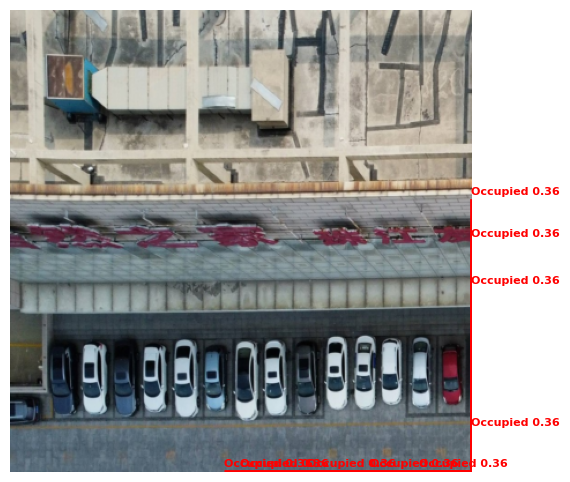

In [5]:
# Quick Test Training (Option 1) - Stable Version
# Run in Google Colab T4 - ~6-8 min total

import os, json, random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import kagglehub
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms as T
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# ---------------- Config ----------------
DATASET_KAGGLE = "loveffc/parking-space-detection-based-on-top-view"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 2
NUM_EPOCHS = 10
LR = 0.001                # <<< reduced for stability
OUTPUT_DIR = "/content"
QUICK_MODEL_PATH = os.path.join(OUTPUT_DIR, "parking_rcnn_quick.pth")
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# ---------------- Download dataset ----------------
print("Downloading dataset…")
path = kagglehub.dataset_download(DATASET_KAGGLE)
print("Dataset downloaded to:", path)

# ---------------- Dataset class ----------------
class ParkingDataset(Dataset):
    def __init__(self, root_dir, transforms=None):
        self.root_dir = root_dir
        self.transforms = transforms
        self.image_paths = []
        for root, _, files in os.walk(root_dir):
            for f in files:
                if f.lower().endswith((".jpg", ".png")):
                    self.image_paths.append(os.path.join(root, f))
        self.image_paths = sorted(self.image_paths)
        if len(self.image_paths) == 0:
            raise RuntimeError(f"No images found under {root_dir}")

    def __len__(self): return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        json_path = img_path.rsplit(".", 1)[0] + ".json"

        img = Image.open(img_path).convert("RGB")
        w, h = img.size

        if os.path.exists(json_path):
            with open(json_path, "r") as f:
                data = json.load(f)
            annotations = data.get("labels", data if isinstance(data, list) else [])
        else:
            annotations = []

        boxes, labels = [], []
        for obj in annotations:
            try:
                x1, y1 = int(obj.get("x1", obj.get("xmin", 0))), int(obj.get("y1", obj.get("ymin", 0)))
                x2, y2 = int(obj.get("x2", obj.get("xmax", w-1))), int(obj.get("y2", obj.get("ymax", h-1)))
            except:
                continue
            if x2 <= x1 or y2 <= y1:
                continue
            boxes.append([x1,y1,x2,y2])
            name = str(obj.get("name","")).lower()
            labels.append(1 if "vac" in name else 2)  # 1=vacant, 2=occupied

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels, "image_id": torch.tensor([idx])}
        if self.transforms:
            img = self.transforms(img)
        return img, target

# ---------------- Transform & Dataset ----------------
transform = T.Compose([
    T.Resize((400,400)),   # smaller image = faster training
    T.ToTensor()
])
dataset = ParkingDataset(path, transforms=transform)
print("Total images:", len(dataset))

train_size = int(0.8*len(dataset))
val_size = len(dataset)-train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

def collate_fn(batch): return tuple(zip(*batch))
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(val_ds, batch_size=1, shuffle=False, collate_fn=collate_fn)

# ---------------- Model ----------------
num_classes = 3
print("Creating model (mobilenet backbone)...")
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(weights="COCO_V1")
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.to(DEVICE)

# ---------------- Optimizer ----------------
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=LR, momentum=0.9, weight_decay=0.0005)

# ---------------- Training ----------------
print("Quick training start…")
for epoch in range(NUM_EPOCHS):
    model.train()
    loss_sum = 0
    for images, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}"):
        images = [img.to(DEVICE) for img in images]
        targets = [{k: v.to(DEVICE) for k,v in t.items()} for t in targets]
        loss_dict = model(images, targets)
        loss = sum(loss for loss in loss_dict.values())
        if not torch.isfinite(loss):   # avoid NaN/inf losses
            print("⚠️ Skipping batch due to NaN/Inf loss")
            continue
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)  # <<< gradient clipping
        optimizer.step()
        loss_sum += loss.item()
    print(f"Epoch {epoch+1} train loss: {loss_sum/len(train_loader):.4f}")

torch.save(model.state_dict(), QUICK_MODEL_PATH)
print("✅ Quick model saved to:", QUICK_MODEL_PATH)

# ---------------- Quick Inference ----------------
model.eval()
images, targets = next(iter(val_loader))
images = [img.to(DEVICE) for img in images]
with torch.no_grad():
    preds = model(images)

def visualize(img_tensor, prediction, score_thresh=0.3):   # lowered thresh
    img = img_tensor.cpu().numpy().transpose(1,2,0)
    fig, ax = plt.subplots(1, figsize=(8,6))
    ax.imshow(img)
    for box,lab,score in zip(prediction[0]["boxes"], prediction[0]["labels"], prediction[0]["scores"]):
        if score < score_thresh: continue
        x1,y1,x2,y2 = box.int().cpu().numpy()
        color = "red" if lab==2 else "green"
        rect = plt.Rectangle((x1,y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2)
        ax.add_patch(rect)
        ax.text(x1, y1-4, f"{'Occupied' if lab==2 else 'Vacant'} {score:.2f}",
                color=color, fontsize=8, weight="bold")
    ax.axis("off"); plt.show()

visualize(images[0].cpu(), preds, score_thresh=0.3)


# FINAL TRAINING FOR 50 EPOCHS



Using Colab cache for faster access to the 'parking-space-detection-based-on-top-view' dataset.
Dataset downloaded to: /kaggle/input/parking-space-detection-based-on-top-view
Total images found: 150
Train size: 120, Val size: 30
Creating model (fasterrcnn_resnet50_fpn pretrained backbone)...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting training on cuda


Epoch 1/50  train_loss=0.8809  val_loss=0.5538
Saved BEST model: /content/parking_rcnn_best.pth


Epoch 2/50  train_loss=0.4942  val_loss=0.5060
Saved BEST model: /content/parking_rcnn_best.pth


Epoch 3/50  train_loss=0.3551  val_loss=0.4289
Saved BEST model: /content/parking_rcnn_best.pth


Epoch 4/50  train_loss=0.2923  val_loss=0.3538
Saved BEST model: /content/parking_rcnn_best.pth


Epoch 5/50  train_loss=0.2520  val_loss=0.3210
Saved BEST model: /content/parking_rcnn_best.pth


Epoch 6/50  train_loss=0.2105  val_loss=0.3122
Saved BEST model: /content/parking_rcnn_best.pth


Epoch 7/50  train_loss=0.1812  val_loss=0.3134


Epoch 8/50  train_loss=0.1675  val_loss=0.3343


Epoch 9/50  train_loss=0.1746  val_loss=0.3432


Epoch 10/50  train_loss=0.1656  val_loss=0.3100
Saved BEST model: /content/parking_rcnn_best.pth


Epoch 11/50  train_loss=0.1123  val_loss=0.2760
Saved BEST model: /content/parking_rcnn_best.pth


Epoch 12/50  train_loss=0.0996  val_loss=0.2895


Epoch 13/50  train_loss=0.0961  val_loss=0.2873


Epoch 14/50  train_loss=0.0931  val_loss=0.2845


Epoch 15/50  train_loss=0.0929  val_loss=0.2936


Epoch 16/50  train_loss=0.0888  val_loss=0.2915


Epoch 17/50  train_loss=0.0867  val_loss=0.2912


Epoch 18/50  train_loss=0.0850  val_loss=0.3015


Epoch 19/50  train_loss=0.0840  val_loss=0.2950


Epoch 20/50  train_loss=0.0822  val_loss=0.2913


Epoch 21/50  train_loss=0.0800  val_loss=0.2925


Epoch 22/50  train_loss=0.0806  val_loss=0.2887


Epoch 23/50  train_loss=0.0799  val_loss=0.2977


Epoch 24/50  train_loss=0.0790  val_loss=0.2995


Epoch 25/50  train_loss=0.0794  val_loss=0.2862


Epoch 26/50  train_loss=0.0783  val_loss=0.3018


Epoch 27/50  train_loss=0.0780  val_loss=0.2891


Epoch 28/50  train_loss=0.0794  val_loss=0.2895


Epoch 29/50  train_loss=0.0797  val_loss=0.2947


Epoch 30/50  train_loss=0.0773  val_loss=0.2953


Epoch 31/50  train_loss=0.0778  val_loss=0.2928


Epoch 32/50  train_loss=0.0794  val_loss=0.2917


Epoch 33/50  train_loss=0.0778  val_loss=0.2893


Epoch 34/50  train_loss=0.0776  val_loss=0.2977


Epoch 35/50  train_loss=0.0764  val_loss=0.2869


Epoch 36/50  train_loss=0.0791  val_loss=0.2981


Epoch 37/50  train_loss=0.0768  val_loss=0.2926


Epoch 38/50  train_loss=0.0766  val_loss=0.2975


Epoch 39/50  train_loss=0.0771  val_loss=0.2929


Epoch 40/50  train_loss=0.0781  val_loss=0.3053


Epoch 41/50  train_loss=0.0763  val_loss=0.2908


Epoch 42/50  train_loss=0.0774  val_loss=0.2933


Epoch 43/50  train_loss=0.0774  val_loss=0.2907


Epoch 44/50  train_loss=0.0781  val_loss=0.2939


Epoch 45/50  train_loss=0.0772  val_loss=0.2833


Epoch 46/50  train_loss=0.0785  val_loss=0.2925


Epoch 47/50  train_loss=0.0764  val_loss=0.2876


Epoch 48/50  train_loss=0.0768  val_loss=0.2904


Epoch 49/50  train_loss=0.0773  val_loss=0.2947


Epoch 50/50  train_loss=0.0773  val_loss=0.2968
Training finished. Best val loss: 0.27603538893163204
Last model saved to: /content/parking_rcnn_last.pth
Loaded best model from /content/parking_rcnn_best.pth


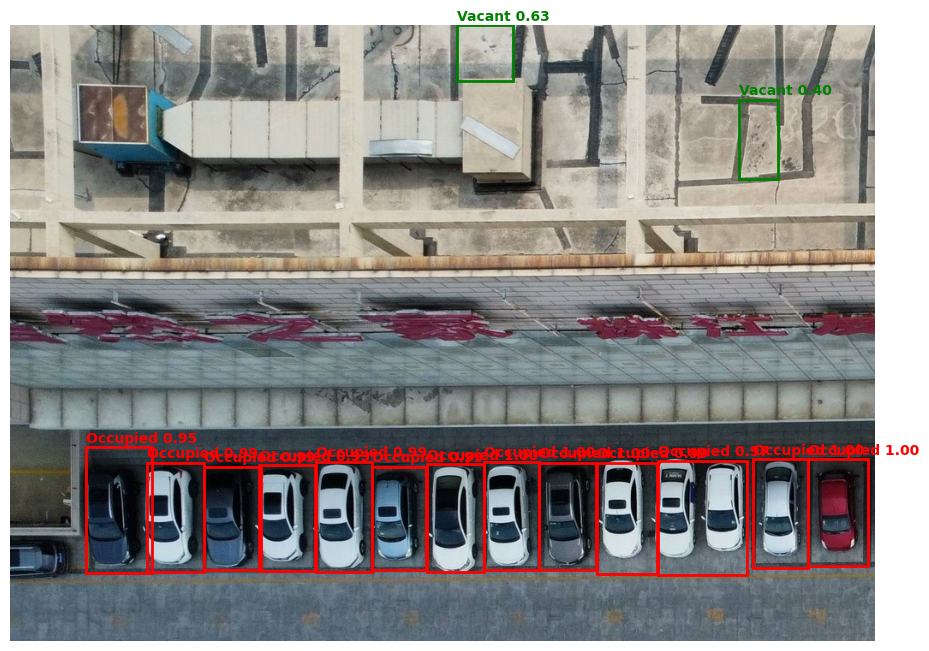

Saved model files:
 - best: /content/parking_rcnn_best.pth
 - last: /content/parking_rcnn_last.pth


In [7]:
# Single cell: Download -> dataset -> model -> train -> save -> quick inference
# Run in Google Colab (GPU recommended)

import os, json, random, time, copy
from glob import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms as T
from PIL import Image
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# -------------------------- Config --------------------------
DATASET_KAGGLE = "loveffc/parking-space-detection-based-on-top-view"
DOWNLOAD_DIR = None
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 2
NUM_EPOCHS = 50          # 50 epochs
LR = 0.005
WEIGHT_DECAY = 0.0005
OUTPUT_DIR = "/content"
BEST_MODEL_PATH = os.path.join(OUTPUT_DIR, "parking_rcnn_best.pth")
LAST_MODEL_PATH = os.path.join(OUTPUT_DIR, "parking_rcnn_last.pth")
SEED = 42
NUM_WORKERS = 2

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# -------------------- Step 1: download dataset --------------------
print("Downloading dataset (kagglehub) …")
path = kagglehub.dataset_download(DATASET_KAGGLE)
print("Dataset downloaded to:", path)
DOWNLOAD_DIR = path

# -------------------- Step 2: Dataset class --------------------
class ParkingDataset(Dataset):
    def __init__(self, root_dir, transforms=None):
        self.root_dir = root_dir
        self.transforms = transforms
        self.image_paths = []
        for root, _, files in os.walk(root_dir):
            for f in files:
                if f.lower().endswith((".jpg", ".png")):
                    self.image_paths.append(os.path.join(root, f))
        self.image_paths = sorted(self.image_paths)
        if len(self.image_paths) == 0:
            raise RuntimeError(f"No images found under {root_dir}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        json_path = img_path.rsplit(".", 1)[0] + ".json"
        img = Image.open(img_path).convert("RGB")
        w, h = img.size

        # load annotation
        if os.path.exists(json_path):
            with open(json_path, "r") as f:
                data = json.load(f)
            annotations = data.get("labels", data if isinstance(data, list) else [])
        else:
            annotations = []

        boxes, labels = [], []
        for obj in annotations:
            try:
                x1 = int(obj.get("x1", obj.get("xmin", 0)))
                y1 = int(obj.get("y1", obj.get("ymin", 0)))
                x2 = int(obj.get("x2", obj.get("xmax", w-1)))
                y2 = int(obj.get("y2", obj.get("ymax", h-1)))
            except:
                continue
            if x2 <= x1 or y2 <= y1:
                continue
            boxes.append([x1, y1, x2, y2])
            name = str(obj.get("name", "")).strip().lower()
            if "vac" in name or "empty" in name or "free" in name:
                labels.append(1)
            else:
                labels.append(2)

        boxes = torch.as_tensor(boxes, dtype=torch.float32) if len(boxes) else torch.zeros((0,4), dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64) if len(labels) else torch.zeros((0,), dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels, "image_id": torch.tensor([idx])}
        if self.transforms:
            img = self.transforms(img)
        return img, target

# -------------------- Step 3: transforms & dataset --------------------
transform = T.Compose([T.ToTensor()])
dataset = ParkingDataset(DOWNLOAD_DIR, transforms=transform)
print("Total images found:", len(dataset))

# -------------------- Step 4: train/val split --------------------
train_ratio = 0.8
n_train = int(train_ratio * len(dataset))
n_val = len(dataset) - n_train
train_ds, val_ds = random_split(dataset, [n_train, n_val])
print(f"Train size: {len(train_ds)}, Val size: {len(val_ds)}")

def collate_fn(batch): return tuple(zip(*batch))
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, collate_fn=collate_fn)
val_loader = DataLoader(val_ds, batch_size=1, shuffle=False, num_workers=NUM_WORKERS, collate_fn=collate_fn)

# -------------------- Step 5: model --------------------
num_classes = 3
print("Creating model (fasterrcnn_resnet50_fpn pretrained backbone)...")
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.to(DEVICE)

# -------------------- Step 6: optimizer / scheduler --------------------
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=LR, momentum=0.9, weight_decay=WEIGHT_DECAY)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# -------------------- Step 7: training loop --------------------
best_loss = float("inf")
history = {"train_loss": [], "val_loss": []}

print("Starting training on", DEVICE)
for epoch in range(NUM_EPOCHS):
    model.train()
    epoch_loss = 0.0
    it = 0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} train", leave=False)
    for images, targets in pbar:
        images = [img.to(DEVICE) for img in images]
        targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        epoch_loss += losses.item()
        it += 1
        pbar.set_postfix({"loss": losses.item()})

    epoch_loss /= max(1, it)
    history["train_loss"].append(epoch_loss)
    lr_scheduler.step()

    # ---------- validation ----------
    model.train()  # keep train mode for loss computation
    val_loss = 0.0
    vit = 0
    with torch.no_grad():
        for images, targets in val_loader:
            images = [img.to(DEVICE) for img in images]
            targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            val_loss += losses.item()
            vit += 1
    val_loss /= max(1, vit)
    history["val_loss"].append(val_loss)

    print(f"Epoch {epoch+1}/{NUM_EPOCHS}  train_loss={epoch_loss:.4f}  val_loss={val_loss:.4f}")

    # save last
    torch.save({
        "epoch": epoch+1,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "train_loss": epoch_loss,
        "val_loss": val_loss,
    }, LAST_MODEL_PATH)

    # save best
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save({
            "epoch": epoch+1,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "train_loss": epoch_loss,
            "val_loss": val_loss,
        }, BEST_MODEL_PATH)
        print("Saved BEST model:", BEST_MODEL_PATH)

print("Training finished. Best val loss:", best_loss)
print("Last model saved to:", LAST_MODEL_PATH)

# -------------------- Step 8: Quick inference & visualize --------------------
def visualize_prediction(img_tensor, prediction, score_thresh=0.4):
    img = img_tensor.cpu().numpy().transpose(1,2,0).copy()
    fig, ax = plt.subplots(1, figsize=(12,8))
    ax.imshow(img)
    boxes = prediction[0]["boxes"].cpu().numpy()
    labels = prediction[0]["labels"].cpu().numpy()
    scores = prediction[0]["scores"].cpu().numpy()
    for box, lab, score in zip(boxes, labels, scores):
        if score < score_thresh: continue
        x1,y1,x2,y2 = box.astype(int)
        color = "red" if lab==2 else "green"
        rect = plt.Rectangle((x1,y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2)
        ax.add_patch(rect)
        ax.text(x1, y1-6, f"{'Occupied' if lab==2 else 'Vacant'} {score:.2f}", color=color, fontsize=10, weight="bold")
    ax.axis('off')
    plt.show()

# load best model
ckpt = torch.load(BEST_MODEL_PATH, map_location=DEVICE)
model.load_state_dict(ckpt["model_state_dict"])
model.eval()
print("Loaded best model from", BEST_MODEL_PATH)

# Run inference on one val image
val_iter = iter(val_loader)
images, targets = next(val_iter)
images = [img.to(DEVICE) for img in images]
with torch.no_grad():
    preds = model(images)

visualize_prediction(images[0].cpu(), preds, score_thresh=0.4)

print("Saved model files:")
print(" - best:", BEST_MODEL_PATH)
print(" - last:", LAST_MODEL_PATH)


In [ ]:
print("Below is the information about the traning of model⬇️ ")

*Dataset Download: The parking space dataset is downloaded from Kaggle using kagglehub, which includes top-view images (.jpg) and their corresponding annotation files (.json). This provides both the visual data and labels for supervised training.*


*Custom Dataset Class: A ParkingDataset class is defined to manage the dataset. It scans the folder for images, matches each .jpg with its .json, and ensures each image has corresponding annotation data.*


*Annotation Processing: The JSON files are parsed to extract bounding box coordinates (x1, y1, x2, y2) and occupancy labels (Vacant or Occupied). These are converted into PyTorch tensors to serve as targets for object detection training.*


*Image Transformations: Images are transformed using ToTensor(), which converts them into PyTorch tensors normalized between 0 and 1, making them suitable for input into the Faster R-CNN model.*


*Train/Validation Split: The dataset is split into training (80%) and validation (20%) subsets using random_split, ensuring the model can learn from one set and be evaluated on unseen data from the other set.*


*Model Setup: A Faster R-CNN object detection model with a ResNet50-FPN backbone is loaded. Although it uses pre-trained weights for feature extraction, the final prediction head is replaced to predict three classes: background, Vacant, and Occupied.*


*Optimizer and Scheduler: Stochastic Gradient Descent (SGD) is configured with a learning rate, momentum, and weight decay. A step-based learning rate scheduler adjusts the learning rate every 10 epochs to improve convergence.*


*Training Loop: The model is trained for 50 epochs. Each epoch iterates over batches of images, computes the detection loss (classification + bounding box regression), updates model weights, and tracks training loss.*


*Model Checkpoints: After each epoch, the current model is saved as the "last" checkpoint. If the validation loss improves, it also saves the "best" checkpoint to preserve the most accurate version of the model.*


# Inference & Visualization: After training, the best model is loaded for inference. Predictions are made on validation images, and bounding boxes are visualized with color-coded labels (green for Vacant, red for Occupied) along with the model’s confidence scores.

# PRINT THE ACCURACY

In [8]:
def compute_iou(boxA, boxB):
    # box = [x1, y1, x2, y2]
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interW = max(0, xB - xA + 1)
    interH = max(0, yB - yA + 1)
    interArea = interW * interH

    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    iou = interArea / float(boxAArea + boxBArea - interArea + 1e-6)
    return iou

# ---------- simple accuracy ----------
threshold_score = 0.5
threshold_iou = 0.5
total_targets = 0
correct_preds = 0

model.eval()
with torch.no_grad():
    for images, targets in val_loader:
        images = [img.to(DEVICE) for img in images]
        outputs = model(images)

        for t, pred in zip(targets, outputs):
            gt_boxes = t['boxes'].cpu().numpy()
            pred_boxes = pred['boxes'].cpu().numpy()
            pred_scores = pred['scores'].cpu().numpy()
            pred_labels = pred['labels'].cpu().numpy()

            # filter by score threshold
            keep_idx = pred_scores >= threshold_score
            pred_boxes = pred_boxes[keep_idx]
            pred_labels = pred_labels[keep_idx]

            total_targets += len(gt_boxes)
            matched = set()
            for p_box in pred_boxes:
                for i, gt_box in enumerate(gt_boxes):
                    if i in matched:
                        continue
                    if compute_iou(p_box, gt_box) >= threshold_iou:
                        correct_preds += 1
                        matched.add(i)
                        break

accuracy = correct_preds / max(1, total_targets)
print(f"Validation accuracy (IoU >= {threshold_iou}, score >= {threshold_score}): {accuracy*100:.2f}%")


Validation accuracy (IoU >= 0.5, score >= 0.5): 95.83%


# **Testing the Model on different Google Images**

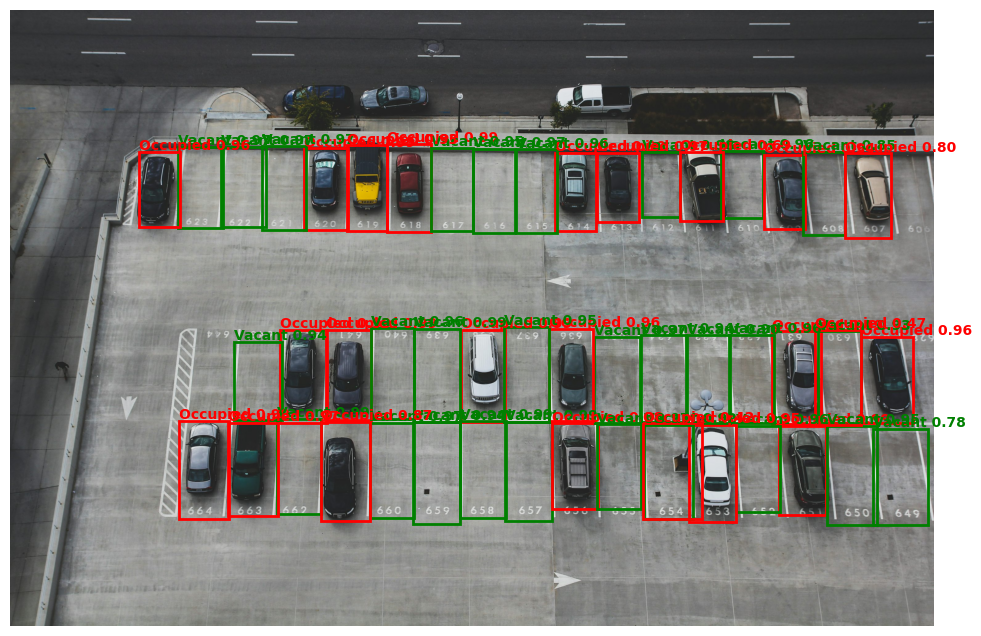

In [9]:
from PIL import Image
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np

# --- Config ---
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BEST_MODEL_PATH = "/content/parking_rcnn_best.pth"  # your saved model
NUM_CLASSES = 3

# --- Load model ---
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, NUM_CLASSES)
ckpt = torch.load(BEST_MODEL_PATH, map_location=DEVICE)
model.load_state_dict(ckpt["model_state_dict"])
model.to(DEVICE)
model.eval()

# --- Load & transform image ---
img_path = "/content/photo-1506521781263-d8422e82f27a.jpeg"
img_pil = Image.open(img_path).convert("RGB")
transform = T.ToTensor()
img_tensor = transform(img_pil).to(DEVICE)

# --- Inference ---
with torch.no_grad():
    preds = model([img_tensor])

# --- Visualization ---
def visualize_prediction(img_pil, prediction, score_thresh=0.4):
    img = np.array(img_pil)
    fig, ax = plt.subplots(1, figsize=(12,8))
    ax.imshow(img)
    boxes = prediction[0]["boxes"].cpu().numpy()
    labels = prediction[0]["labels"].cpu().numpy()
    scores = prediction[0]["scores"].cpu().numpy()
    for box, lab, score in zip(boxes, labels, scores):
        if score < score_thresh:
            continue
        x1, y1, x2, y2 = box.astype(int)
        color = "red" if lab == 2 else "green"
        rect = plt.Rectangle((x1,y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2)
        ax.add_patch(rect)
        ax.text(x1, y1-6, f"{'Occupied' if lab==2 else 'Vacant'} {score:.2f}",
                color=color, fontsize=10, weight="bold")
    ax.axis('off')
    plt.show()

visualize_prediction(img_pil, preds)


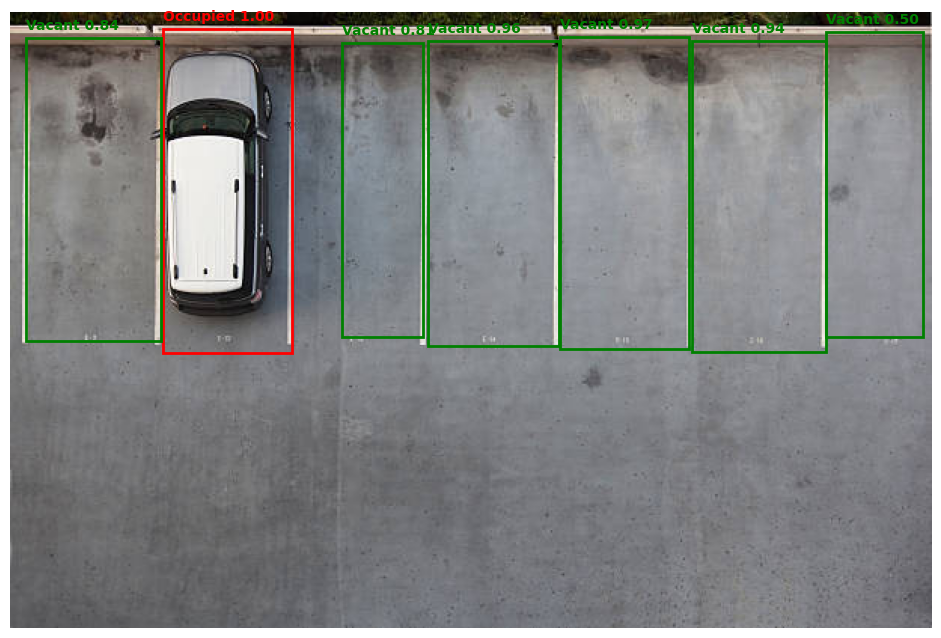

In [10]:
from PIL import Image
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np

# --- Config ---
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BEST_MODEL_PATH = "/content/parking_rcnn_best.pth"  # your saved model
NUM_CLASSES = 3

# --- Load model ---
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, NUM_CLASSES)
ckpt = torch.load(BEST_MODEL_PATH, map_location=DEVICE)
model.load_state_dict(ckpt["model_state_dict"])
model.to(DEVICE)
model.eval()

# --- Load & transform image ---
img_path = "/content/istockphoto-182821556-612x612.jpg"
img_pil = Image.open(img_path).convert("RGB")
transform = T.ToTensor()
img_tensor = transform(img_pil).to(DEVICE)

# --- Inference ---
with torch.no_grad():
    preds = model([img_tensor])

# --- Visualization ---
def visualize_prediction(img_pil, prediction, score_thresh=0.4):
    img = np.array(img_pil)
    fig, ax = plt.subplots(1, figsize=(12,8))
    ax.imshow(img)
    boxes = prediction[0]["boxes"].cpu().numpy()
    labels = prediction[0]["labels"].cpu().numpy()
    scores = prediction[0]["scores"].cpu().numpy()
    for box, lab, score in zip(boxes, labels, scores):
        if score < score_thresh:
            continue
        x1, y1, x2, y2 = box.astype(int)
        color = "red" if lab == 2 else "green"
        rect = plt.Rectangle((x1,y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2)
        ax.add_patch(rect)
        ax.text(x1, y1-6, f"{'Occupied' if lab==2 else 'Vacant'} {score:.2f}",
                color=color, fontsize=10, weight="bold")
    ax.axis('off')
    plt.show()

visualize_prediction(img_pil, preds)


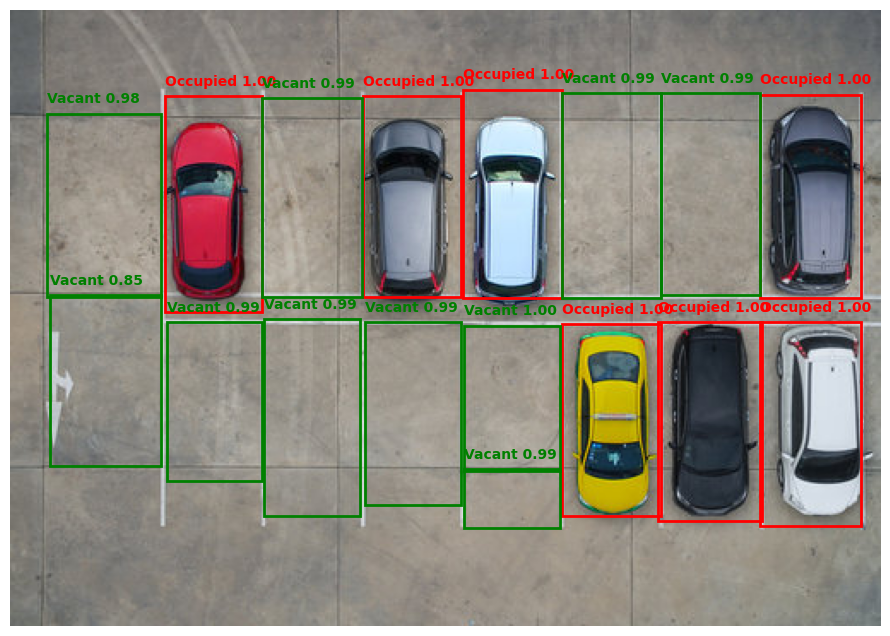

In [12]:
from PIL import Image
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np

# --- Config ---
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BEST_MODEL_PATH = "/content/parking_rcnn_best.pth"  # your saved model
NUM_CLASSES = 3

# --- Load model ---
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, NUM_CLASSES)
ckpt = torch.load(BEST_MODEL_PATH, map_location=DEVICE)
model.load_state_dict(ckpt["model_state_dict"])
model.to(DEVICE)
model.eval()

# --- Load & transform image ---
img_path = "/content/360_F_141525488_72uJpshyiOmpW7uLTgSlnr4s45yxAqr8.jpg"
img_pil = Image.open(img_path).convert("RGB")
transform = T.ToTensor()
img_tensor = transform(img_pil).to(DEVICE)

# --- Inference ---
with torch.no_grad():
    preds = model([img_tensor])

# --- Visualization ---
def visualize_prediction(img_pil, prediction, score_thresh=0.4):
    img = np.array(img_pil)
    fig, ax = plt.subplots(1, figsize=(12,8))
    ax.imshow(img)
    boxes = prediction[0]["boxes"].cpu().numpy()
    labels = prediction[0]["labels"].cpu().numpy()
    scores = prediction[0]["scores"].cpu().numpy()
    for box, lab, score in zip(boxes, labels, scores):
        if score < score_thresh:
            continue
        x1, y1, x2, y2 = box.astype(int)
        color = "red" if lab == 2 else "green"
        rect = plt.Rectangle((x1,y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2)
        ax.add_patch(rect)
        ax.text(x1, y1-6, f"{'Occupied' if lab==2 else 'Vacant'} {score:.2f}",
                color=color, fontsize=10, weight="bold")
    ax.axis('off')
    plt.show()

visualize_prediction(img_pil, preds)
